In [2]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt

In [3]:
weights = [10, 5, 2, 8, 15, 7, 8, 12, 6, 12]
values = [1, 2, 3, 4, 5, 4, 6, 2, 4, 7]
fitness = mlrose.Knapsack(weights=weights, values=values, max_weight_pct=0.5)

In [4]:
problem = mlrose.DiscreteOpt(length = 10, fitness_fn = fitness, maximize = True, max_val = 2)

## SA

In [8]:


# Define initial state
init_state = np.array([1,1,1,1,1,0,0,0,0,0])

max_atempts_list = [10,100]
init_temp_list = [5, 1]
decay_list = [0.01, 0.001]

fitness_curve_dict_sa = {}
best_fitness_dict_sa = {}
for max_attempt in max_atempts_list:
    for init_temp in init_temp_list:
        for decay in decay_list:
            schedule = mlrose.ArithDecay(init_temp=init_temp,decay=decay)
            best_state, best_fitness, fitness_curve = \
                mlrose.simulated_annealing(problem=problem, 
                                           schedule=schedule,
                                           max_attempts=max_attempt, 
        #                                        max_iters=max_iter,
                                           init_state=init_state,
                                           random_state=1,
                                           curve=True)
            key = 'max attempt: {}, init temp: {}, delta T: {}, best fitness score: {}'.format(max_attempt, init_temp, decay, best_fitness)
            fitness_curve_dict_sa[key] = fitness_curve
            best_fitness_dict_sa[key] = best_fitness

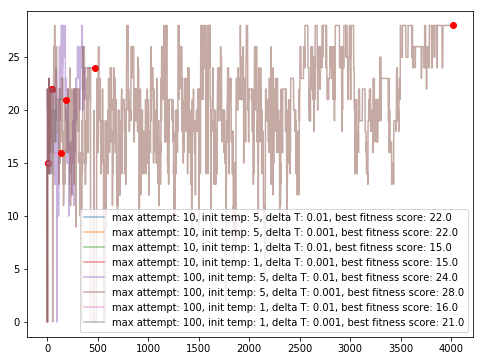

In [9]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_sa.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

In [27]:
# Define decay schedule
schedule = mlrose.ArithDecay(init_temp=2,decay=0.001)

# Define initial state
init_state = np.array([1,1,1,1,1,0,0,0,0,0])

max_atempts_list = [50]
max_iters_list = [1000]



fitness_curve_dict_sa = {}
best_fitness_dict_sa = {}

init_temp_list = [1,2,5]
decay_list = [0.01,0.001]
for init_temp in init_temp_list:
    for decay in decay_list:
        schedule = mlrose.ArithDecay(init_temp=init_temp,decay=decay)
        for max_attempt in max_atempts_list:
            for max_iter in max_iters_list:
                best_state, best_fitness, fitness_curve = \
                    mlrose.simulated_annealing(problem=problem, 
                                               schedule=schedule,
                                               max_attempts=max_attempt, 
        #                                        max_iters=max_iter,
                                               init_state=init_state,
                                               random_state=1,
                                               curve=True)
        key = 'initial temp: {}, delta temp: {}, best fitness score: {}'.format(init_temp, decay, best_fitness)
        fitness_curve_dict_sa[key] = fitness_curve
        best_fitness_dict_sa[key] = best_fitness

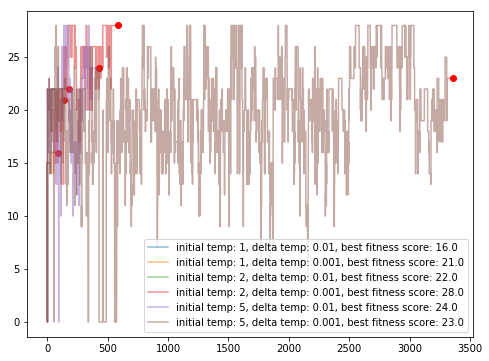

In [29]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_sa.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

## RHC

In [40]:
# max_atempts_list = [10,50,100] # list(range(10,50,10))
max_iters_list = [1000]

fitness_curve_dict_rhc = {}
best_fitness_dict_rhc = {}
for max_attempt in max_atempts_list:
    for max_iter in max_iters_list:
        best_state, best_fitness, fitness_curve = \
            mlrose.random_hill_climb(problem=problem,
                                    max_attempts=max_attempt,
                                    max_iters=max_iter,
                                    curve=True,
                                    random_state=1,
                                    restarts=5)
        key = 'max attempt: {}, best fitness score: {}'.format(max_attempt, best_fitness)
        fitness_curve_dict_rhc[key] = fitness_curve
        best_fitness_dict_rhc[key] = best_fitness

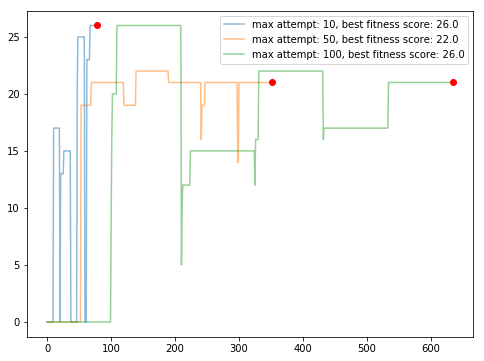

In [41]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_rhc.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

## GA

In [35]:
pop_size_list = [10,200] # list(range(10,200,50))
mutation_prob_list = [0.1,0.5]#[0.01,0.1,0.5]
max_attempt_list = [10,100]

fitness_curve_dict_ga = {}
best_fitness_dict_ga = {}
for max_attempt in max_attempt_list:
    for pop_size in pop_size_list:
        for mutation_prob in mutation_prob_list:
            best_state, best_fitness, fitness_curve = \
                mlrose.genetic_alg(problem=problem,
                                        pop_size=pop_size,
                                        mutation_prob=mutation_prob,
                                        max_attempts=max_attempt,
                                        curve=True,
                                        random_state=1,
                                        )
            key = 'max attempt: {}, pop size: {}, mutaton prob: {}, best fitness score: {}'.format(max_attempt, pop_size, mutation_prob, best_fitness)
            fitness_curve_dict_ga[key] = fitness_curve
            best_fitness_dict_ga[key] = best_fitness

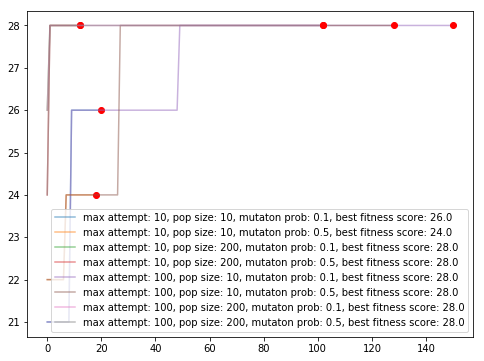

In [36]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_ga.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

## MIMIC

In [8]:
pop_size_list = [10,200] # list(range(10,200,50))
keep_pct_list = [0.1,0.3]
max_attempt_list = [10,100]

fitness_curve_dict_mimic = {}
best_fitness_dict_mimic = {}
for max_attempt in max_attempt_list:
    for pop_size in pop_size_list:
        for keep_pct in keep_pct_list:
            best_state, best_fitness, fitness_curve = \
                mlrose.mimic(problem=problem,
                                        pop_size=pop_size,
                                        keep_pct=keep_pct,
                                        max_attempts=max_attempt,
                                        curve=True,
                                        random_state=1,
                                        )
            key = 'max_attempt: {}, pop size: {}, keep pct: {}, best fitness score: {}'.format(max_attempt, pop_size, keep_pct, best_fitness)
            fitness_curve_dict_mimic[key] = fitness_curve
            best_fitness_dict_mimic[key] = best_fitness

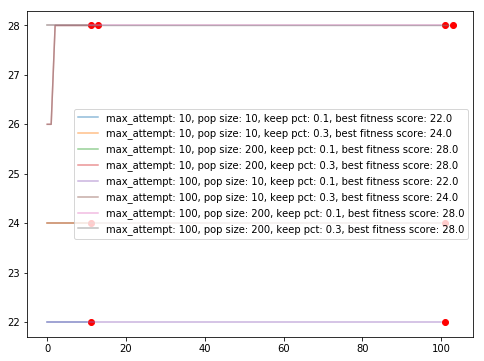

In [9]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_mimic.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()